In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('boat_data.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9888 entries, 0 to 9887
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Price                        9888 non-null   object 
 1   Boat Type                    9888 non-null   object 
 2   Manufacturer                 8550 non-null   object 
 3   Type                         9882 non-null   object 
 4   Year Built                   9888 non-null   int64  
 5   Length                       9879 non-null   float64
 6   Width                        9832 non-null   float64
 7   Material                     8139 non-null   object 
 8   Location                     9852 non-null   object 
 9   Number of views last 7 days  9888 non-null   int64  
dtypes: float64(2), int64(2), object(6)
memory usage: 772.6+ KB


In [4]:
data.head()

,Price,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Number of views last 7 days
0,CHF 3337,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.00,1.90,NaN,Switzerland Â» Lake Geneva Â» VÃ©senaz,226
1,EUR 3490,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,Germany Â» BÃ¶nningstedt,75
2,CHF 3770,Sport Boat,Marine power boats,new boat from stock,0,3.69,1.42,Aluminium,Switzerland Â» Lake of Zurich Â» StÃ¤fa ZH,124
3,DKK 25900,Sport Boat,Pioner power boats,new boat from stock,2020,3.00,1.00,NaN,Denmark Â» Svendborg,64
4,EUR 3399,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,Germany Â» Bayern Â» MÃ¼nchen,58


In [5]:
data[['currency','Price']]= data['Price'].str.split(' ', 1, expand=True)

<ipython-input-5-5fae122a33b4>:1: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  data[['currency','Price']]= data['Price'].str.split(' ', 1, expand=True)


In [6]:
def pricedollars(Price,currency):
    if currency=='EUR':
        return int(Price) * 1.11
    elif currency=='CHF':
        return int(Price) * 1.13
    elif currency=='DKK':
        return int(Price) * 0.15
    elif currency=='Â£':
        return int(Price) * 1.25
data['price_dollar'] = data.apply(lambda x: pricedollars(x.Price, x.currency), axis=1)

In [7]:
data.head()

,Price,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Number of views last 7 days,currency,price_dollar
0,3337,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.00,1.90,NaN,Switzerland Â» Lake Geneva Â» VÃ©senaz,226,CHF,3770.81
1,3490,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,Germany Â» BÃ¶nningstedt,75,EUR,3873.90
2,3770,Sport Boat,Marine power boats,new boat from stock,0,3.69,1.42,Aluminium,Switzerland Â» Lake of Zurich Â» StÃ¤fa ZH,124,CHF,4260.10
3,25900,Sport Boat,Pioner power boats,new boat from stock,2020,3.00,1.00,NaN,Denmark Â» Svendborg,64,DKK,3885.00
4,3399,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,Germany Â» Bayern Â» MÃ¼nchen,58,EUR,3772.89


In [8]:
data = data.drop(['Price', 'Location', 'currency'], axis=1)

In [9]:
data.isna().sum()

Boat Type                         0
Manufacturer                   1338
Type                              6
Year Built                        0
Length                            9
Width                            56
Material                       1749
Number of views last 7 days       0
price_dollar                      0
dtype: int64

In [10]:
data = data.dropna()

In [11]:
data.isna().sum()

Boat Type                      0
Manufacturer                   0
Type                           0
Year Built                     0
Length                         0
Width                          0
Material                       0
Number of views last 7 days    0
price_dollar                   0
dtype: int64

In [12]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
le = LabelEncoder()
sc = StandardScaler()
target_scaler = MinMaxScaler()

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7048 entries, 1 to 9887
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Boat Type                    7048 non-null   object 
 1   Manufacturer                 7048 non-null   object 
 2   Type                         7048 non-null   object 
 3   Year Built                   7048 non-null   int64  
 4   Length                       7048 non-null   float64
 5   Width                        7048 non-null   float64
 6   Material                     7048 non-null   object 
 7   Number of views last 7 days  7048 non-null   int64  
 8   price_dollar                 7048 non-null   float64
dtypes: float64(3), int64(2), object(4)
memory usage: 550.6+ KB


In [14]:
data['Boat Type'] = le.fit_transform(data['Boat Type'])
data['Manufacturer'] = le.fit_transform(data['Manufacturer'])
data['Type'] = le.fit_transform(data['Type'])
data['Material'] = le.fit_transform(data['Material'])

In [15]:
data['Number of views last 7 days'] = data['Number of views last 7 days'].astype(int)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7048 entries, 1 to 9887
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Boat Type                    7048 non-null   int64  
 1   Manufacturer                 7048 non-null   int64  
 2   Type                         7048 non-null   int64  
 3   Year Built                   7048 non-null   int64  
 4   Length                       7048 non-null   float64
 5   Width                        7048 non-null   float64
 6   Material                     7048 non-null   int64  
 7   Number of views last 7 days  7048 non-null   int64  
 8   price_dollar                 7048 non-null   float64
dtypes: float64(3), int64(6)
memory usage: 550.6 KB


<Axes: >

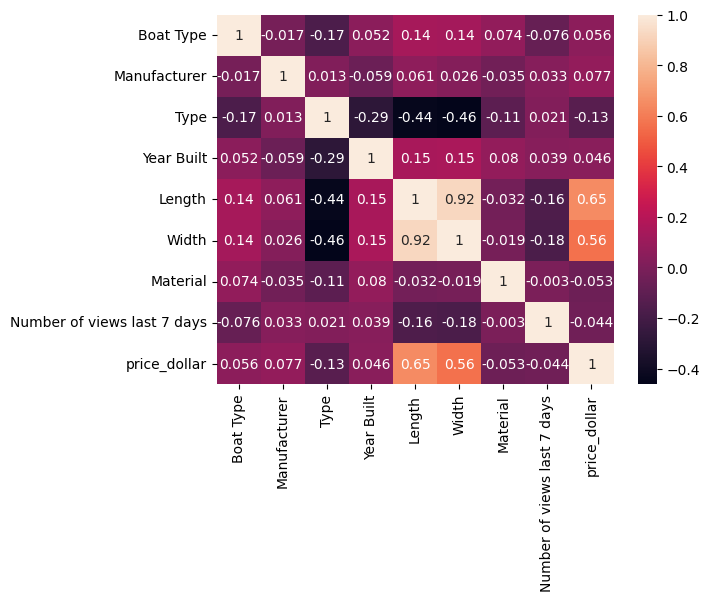

In [17]:
#feature Selection
sns.heatmap(data.corr(), annot=True)

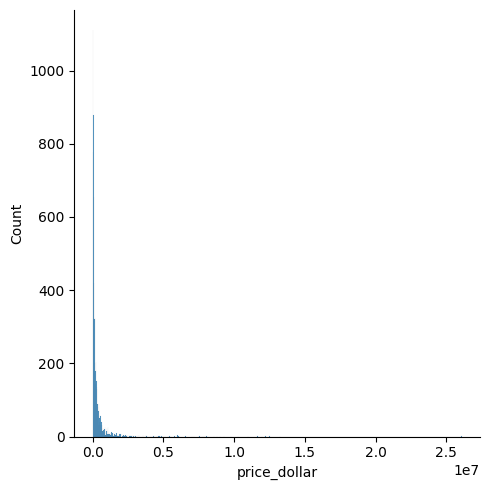

In [18]:
sns.displot(data['price_dollar'])

In [19]:
data.columns

Index(['Boat Type', 'Manufacturer', 'Type', 'Year Built', 'Length', 'Width',
       'Material', 'Number of views last 7 days', 'price_dollar'],
      dtype='object')

In [20]:
X = data.drop(['price_dollar'], axis=1)
y = data['price_dollar']

In [21]:
X = sc.fit_transform(X)
y = np.log10(data['price_dollar'])

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.compose import TransformedTargetRegressor


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=29)

In [24]:
model = LinearRegression()

In [25]:
model.fit(X_train, y_train)

LinearRegression()

In [26]:
pred = model.predict(X_test)

In [27]:
mse = mean_squared_error(y_test, pred)
print(mse)

0.07986921059336337


In [28]:
r2_score(y_test, pred)

0.7368234350256033

In [29]:
error_pred=pd.DataFrame(columns=['Actual_data','Prediction_data'])

error_pred['Actual_data']=y_test
error_pred['Prediction_data']=pred
error_pred['Error']=error_pred['Actual_data']-error_pred['Prediction_data']

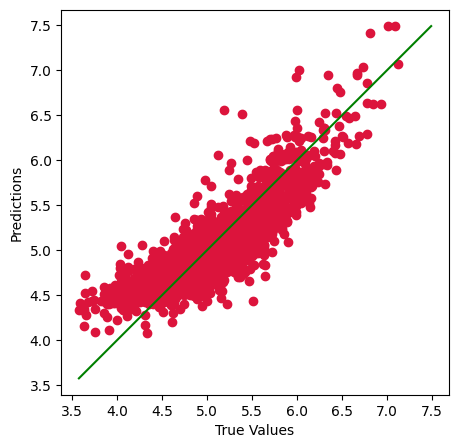

In [30]:
plt.figure(figsize=(5,5))
plt.scatter(error_pred['Actual_data'], error_pred['Prediction_data'], c='crimson')

p1 = max(max(error_pred['Prediction_data']), max(error_pred['Actual_data']))
p2 = min(min(error_pred['Prediction_data']), min(error_pred['Actual_data']))
plt.plot([p1, p2], [p1, p2], '-g')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('equal')
plt.show()

In [31]:
y_test

8355    4.647383
5870    5.191451
4807    5.520687
4440    5.636091
6420    5.044888
          ...   
5456    5.298176
5939    5.175657
418     4.468052
9509    4.221414
563     4.558228
Name: price_dollar, Length: 2115, dtype: float64

In [32]:
pred

array([5.37438415, 5.03138639, 4.84199723, ..., 4.55123341, 4.66132214,
       4.52998477])

In [33]:
pred = 10 ** pred

In [34]:
y_test = 10 ** y_test

In [35]:
error_pred=pd.DataFrame(columns=['Actual_data','Prediction_data'])

error_pred['Actual_data']=y_test
error_pred['Prediction_data']=pred
error_pred['Error']=error_pred['Actual_data']-error_pred['Prediction_data']

In [36]:
error_pred

,Actual_data,Prediction_data,Error
8355,44400.00,236801.337526,-192401.337526
5870,155400.00,107494.535619,47905.464381
4807,331655.00,69501.987846,262153.012154
4440,432604.68,89118.104349,343486.575651
6420,110889.00,194792.211179,-83903.211179
...,...,...,...
5456,198690.00,152600.217397,46089.782603
5939,149850.00,126806.170396,23043.829604
418,29380.00,35582.250358,-6202.250358
9509,16650.00,45848.184473,-29198.184473


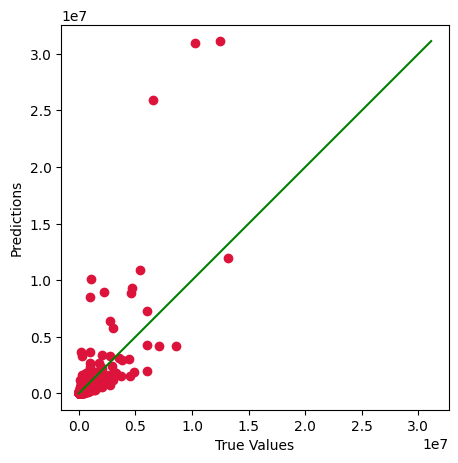

In [37]:
plt.figure(figsize=(5,5))
plt.scatter(error_pred['Actual_data'], error_pred['Prediction_data'], c='crimson')

p1 = max(max(error_pred['Prediction_data']), max(error_pred['Actual_data']))
p2 = min(min(error_pred['Prediction_data']), min(error_pred['Actual_data']))
plt.plot([p1, p2], [p1, p2], '-g')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('equal')
plt.show()